In [1]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,7)})

In [46]:
#load data
data = pd.read_csv("..\\..\\..\\Data\\Day\\dje_MinuteToDay.csv")

In [47]:
data.head()

,Date,Ticker,Per,Open,High,Low,Close,Vol
0,2010-01-04 17:31:40,DSX,1,2992.29,2992.31,2991.98,2991.98,0
1,2010-01-05 17:31:40,DSX,1,3023.20,3023.20,3022.98,3023.06,0
2,2010-01-06 17:31:40,DSX,1,3004.23,3004.33,3004.17,3004.17,0
3,2010-01-07 17:31:40,DSX,1,2995.72,2995.72,2995.40,2995.40,0
4,2010-01-08 17:31:40,DSX,1,3020.43,3020.43,3019.97,3019.97,0


In [48]:
data['Timestamp'] = pd.DataFrame(data.Date)
data.Date = pd.to_datetime(data.Date)
data = data.sort_values(by=["Date"])
if 'Price' in data.columns:
    data.Price = data.Price.str.replace(',', '').astype(float) # Here price is equal to close
else:
    data.Close = data.Close
data.High = data.High
data.Low = data.Low
data.Open = data.Open
if 'Vol.' in data.columns:
    data = data.drop("Vol.", axis = 1)

In [49]:
special_data = pd.DataFrame(data)

In [50]:
special_data = data[(data['Date'] > '2010-01-01') & (data['Date'] < '2015-01-01')]
special_data.index = data.index[:len(special_data)]

In [51]:
#change indexes
special_data.set_index('Date', inplace = True)

In [52]:
data.head(10)

,Date,Ticker,Per,Open,High,Low,Close,Vol,Timestamp
0,2010-01-04 17:31:40,DSX,1,2992.29,2992.31,2991.98,2991.98,0,2010-01-04 17:31:40
1,2010-01-05 17:31:40,DSX,1,3023.20,3023.20,3022.98,3023.06,0,2010-01-05 17:31:40
2,2010-01-06 17:31:40,DSX,1,3004.23,3004.33,3004.17,3004.17,0,2010-01-06 17:31:40
3,2010-01-07 17:31:40,DSX,1,2995.72,2995.72,2995.40,2995.40,0,2010-01-07 17:31:40
4,2010-01-08 17:31:40,DSX,1,3020.43,3020.43,3019.97,3019.97,0,2010-01-08 17:31:40
5,2010-01-09 09:20:00,DSX,1,3019.16,3019.16,3017.85,3017.85,0,2010-01-09 09:20:00
6,2010-01-11 17:31:40,DSX,1,3031.46,3031.70,3031.14,3031.14,0,2010-01-11 17:31:40
7,2010-01-12 17:31:40,DSX,1,2977.24,2977.49,2977.03,2977.49,0,2010-01-12 17:31:40
8,2010-01-13 17:31:40,DSX,1,2982.37,2982.40,2982.19,2982.19,0,2010-01-13 17:31:40
9,2010-01-14 17:31:40,DSX,1,2989.15,2989.65,2989.15,2989.49,0,2010-01-14 17:31:40


In [53]:
special_data.head(10)

,Ticker,Per,Open,High,Low,Close,Vol,Timestamp
Date,,,,,,,,
2010-01-04 17:31:40,DSX,1,2992.29,2992.31,2991.98,2991.98,0,2010-01-04 17:31:40
2010-01-05 17:31:40,DSX,1,3023.20,3023.20,3022.98,3023.06,0,2010-01-05 17:31:40
2010-01-06 17:31:40,DSX,1,3004.23,3004.33,3004.17,3004.17,0,2010-01-06 17:31:40
2010-01-07 17:31:40,DSX,1,2995.72,2995.72,2995.40,2995.40,0,2010-01-07 17:31:40
2010-01-08 17:31:40,DSX,1,3020.43,3020.43,3019.97,3019.97,0,2010-01-08 17:31:40
2010-01-09 09:20:00,DSX,1,3019.16,3019.16,3017.85,3017.85,0,2010-01-09 09:20:00
2010-01-11 17:31:40,DSX,1,3031.46,3031.70,3031.14,3031.14,0,2010-01-11 17:31:40
2010-01-12 17:31:40,DSX,1,2977.24,2977.49,2977.03,2977.49,0,2010-01-12 17:31:40
2010-01-13 17:31:40,DSX,1,2982.37,2982.40,2982.19,2982.19,0,2010-01-13 17:31:40


In [54]:
special_data['new_index'] = special_data.Close
special_data['new_date'] = special_data.Close
special_data.head()

,Ticker,Per,Open,High,Low,Close,Vol,Timestamp,new_index,new_date
Date,,,,,,,,,,
2010-01-04 17:31:40,DSX,1,2992.29,2992.31,2991.98,2991.98,0,2010-01-04 17:31:40,2991.98,2991.98
2010-01-05 17:31:40,DSX,1,3023.20,3023.20,3022.98,3023.06,0,2010-01-05 17:31:40,3023.06,3023.06
2010-01-06 17:31:40,DSX,1,3004.23,3004.33,3004.17,3004.17,0,2010-01-06 17:31:40,3004.17,3004.17
2010-01-07 17:31:40,DSX,1,2995.72,2995.72,2995.40,2995.40,0,2010-01-07 17:31:40,2995.40,2995.40
2010-01-08 17:31:40,DSX,1,3020.43,3020.43,3019.97,3019.97,0,2010-01-08 17:31:40,3019.97,3019.97


In [55]:
import datetime

special_data.loc[0, 'new_index'] = 1262563200
special_data.loc[0, 'new_date'] = datetime.datetime.fromtimestamp(special_data.loc[0, 'new_index']).strftime('%Y-%m-%d %H:%M:%S')
for i in range(len(special_data.new_index)):
    if i > 0:
        special_data.loc[i, 'new_index'] = special_data.new_index[i - 1] + 86400
        special_data.loc[i, 'new_date'] = datetime.datetime.fromtimestamp(special_data.loc[i, 'new_index']).strftime('%Y-%m-%d %H:%M:%S')

In [56]:
#change indexes
date_array = special_data['new_date']
special_data.set_index('new_date', inplace = True)

In [57]:
special_data.head(20)

,Ticker,Per,Open,High,Low,Close,Vol,Timestamp,new_index
new_date,,,,,,,,,
2010-01-04 07:00:00,DSX,1,2992.29,2992.31,2991.98,2991.98,0,2010-01-04 17:31:40,1.262563e+09
2010-01-05 07:00:00,DSX,1,3023.20,3023.20,3022.98,3023.06,0,2010-01-05 17:31:40,1.262650e+09
2010-01-06 07:00:00,DSX,1,3004.23,3004.33,3004.17,3004.17,0,2010-01-06 17:31:40,1.262736e+09
2010-01-07 07:00:00,DSX,1,2995.72,2995.72,2995.40,2995.40,0,2010-01-07 17:31:40,1.262822e+09
2010-01-08 07:00:00,DSX,1,3020.43,3020.43,3019.97,3019.97,0,2010-01-08 17:31:40,1.262909e+09
2010-01-09 07:00:00,DSX,1,3019.16,3019.16,3017.85,3017.85,0,2010-01-09 09:20:00,1.262995e+09
2010-01-10 07:00:00,DSX,1,3031.46,3031.70,3031.14,3031.14,0,2010-01-11 17:31:40,1.263082e+09
2010-01-11 07:00:00,DSX,1,2977.24,2977.49,2977.03,2977.49,0,2010-01-12 17:31:40,1.263168e+09
2010-01-12 07:00:00,DSX,1,2982.37,2982.40,2982.19,2982.19,0,2010-01-13 17:31:40,1.263254e+09


In [58]:
special_data.rename(columns={'Price': 'Close'}, inplace=True)

In [59]:
f = Forecaster(y=special_data['Close'], current_dates = special_data.index)

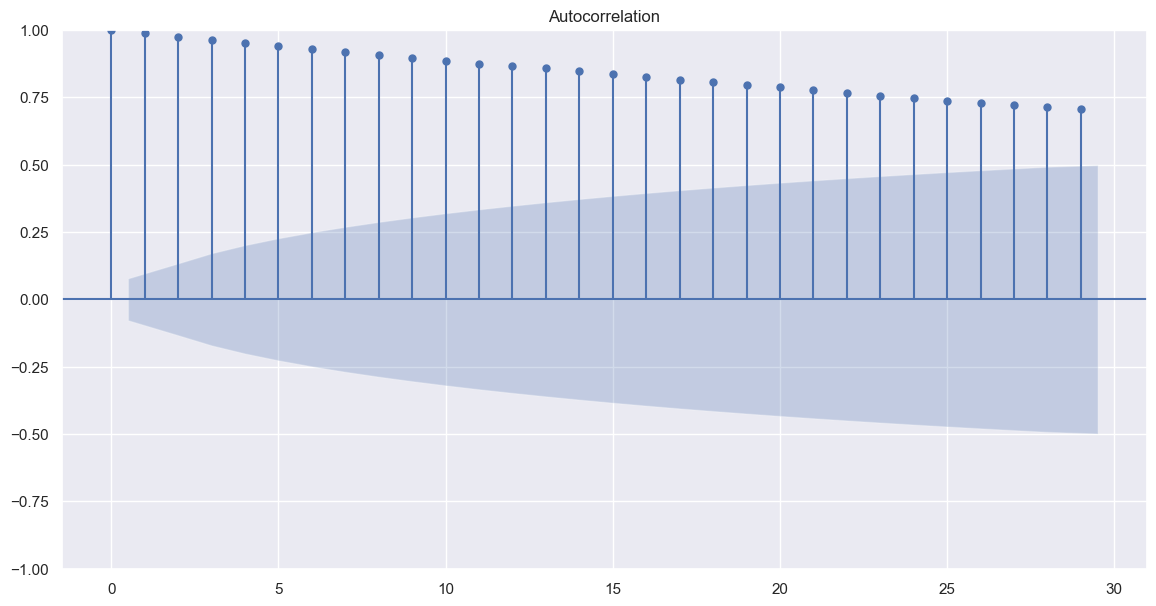

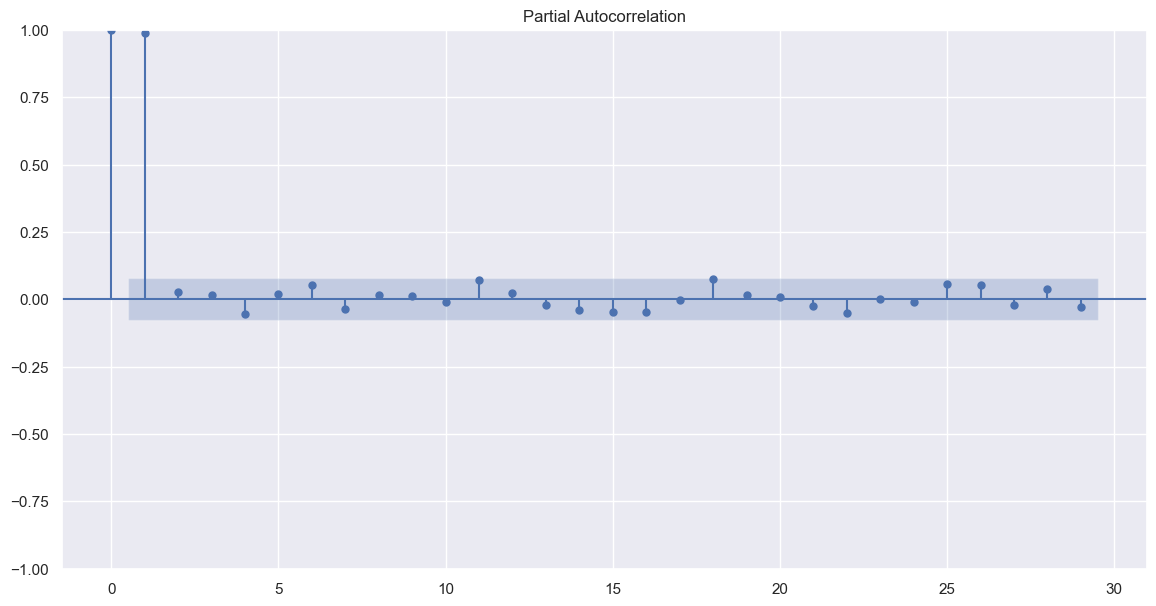

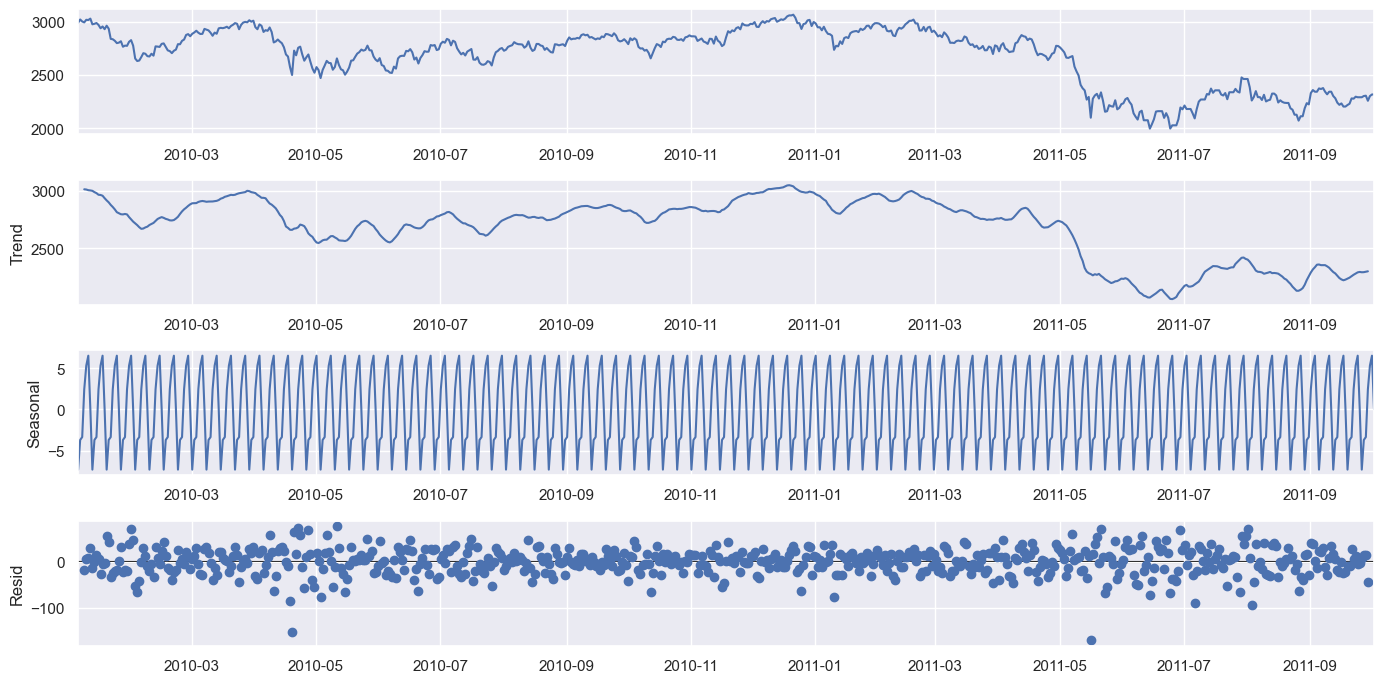

-1.7475955327225425
0.4067715440802081


In [60]:
# EDA
f.plot_acf()
plt.show()
f.plot_pacf()
plt.show()
f.seasonal_decompose().plot()
plt.show()
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

In [61]:
# Forecast
f.manual_forecast(order=(2,1,1),seasonal_order=(2,1,1,12),call_me='arima2')

# View test results
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

# View forecast results
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

# See summary stats
f.regr.summary()

ForecastError: before calling a model, please make sure you have generated future dates by calling generate_future_dates(), set_last_future_date(), or ingest_Xvars_df(use_future_dates=True)

In [62]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [63]:
adf_test(special_data['Close'])

1. ADF :  -1.7475955327225425
2. P-Value :  0.4067715440802081
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 636
5. Critical Values :
	 1% :  -3.4406737255613256
	 5% :  -2.866095119842903
	 10% :  -2.5691958123689727


In [64]:
stepwise_fit = auto_arima(special_data['Close'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  637
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3226.087
Date:                Sun, 22 Oct 2023   AIC                           6454.174
Time:                        23:06:52   BIC                           6458.629
Sample:                    01-04-2010   HQIC                          6455.904
                         - 10-02-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1490.7769     49.123     30.348      0.000    1394.498    1587.055
===================================================================================
Ljung-Box (L1) (Q):                   1.61   Jarque-Bera (JB):               387.00
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                             0.13
Prob(H) (two-sided):                  0.11   Kurtosis:                         6.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
data_len = len(special_data)

In [66]:
train_len = data_len * 0.7
test_len = data_len - train_len

In [67]:
train_data = special_data.iloc[:int(train_len)]

In [68]:
test_data = special_data.iloc[int(train_len):int(train_len + test_len)]

In [69]:
test_data.Close

new_date
2011-03-25 07:00:00    2732.5400
2011-03-26 07:00:00    2733.6000
2011-03-27 07:00:00    2768.2300
2011-03-28 07:00:00    2758.8500
2011-03-29 07:00:00    2697.8900
                         ...    
2011-09-28 07:00:00    2305.0125
2011-09-29 07:00:00    2257.1975
2011-09-30 07:00:00    2301.6050
2011-10-01 07:00:00    2316.5500
2011-10-02 07:00:00    2316.5500
Name: Close, Length: 192, dtype: float64

In [70]:
train_data

,Ticker,Per,Open,High,Low,Close,Vol,Timestamp,new_index
new_date,,,,,,,,,
2010-01-04 07:00:00,DSX,1,2992.29,2992.31,2991.98,2991.98,0,2010-01-04 17:31:40,1.262563e+09
2010-01-05 07:00:00,DSX,1,3023.20,3023.20,3022.98,3023.06,0,2010-01-05 17:31:40,1.262650e+09
2010-01-06 07:00:00,DSX,1,3004.23,3004.33,3004.17,3004.17,0,2010-01-06 17:31:40,1.262736e+09
2010-01-07 07:00:00,DSX,1,2995.72,2995.72,2995.40,2995.40,0,2010-01-07 17:31:40,1.262822e+09
2010-01-08 07:00:00,DSX,1,3020.43,3020.43,3019.97,3019.97,0,2010-01-08 17:31:40,1.262909e+09
...,...,...,...,...,...,...,...,...,...
2011-03-20 07:00:00,DSX,1,2761.85,2761.85,2761.77,2761.77,0,2011-06-06 17:31:40,1.300579e+09
2011-03-21 07:00:00,DSX,1,2775.87,2775.93,2775.83,2775.93,0,2011-06-07 17:31:40,1.300666e+09
2011-03-22 07:00:00,DSX,1,2745.81,2745.95,2745.81,2745.86,0,2011-06-08 17:31:40,1.300752e+09


In [71]:
stepwise_fit = auto_arima(train_data.Close, 
                          seasonal=True, 
                          stepwise=False, suppress_warnings=True, 
                   error_action="ignore", max_order=None, trace=True)           

stepwise_fit.summary()

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=4409.352, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=4410.388, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=4410.791, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=4412.694, Time=0.07 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=4413.977, Time=0.04 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=4415.735, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=4410.502, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=4411.174, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=4412.161, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=4414.032, Time=0.22 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=4415.844, Time=0.15 sec
 ARIMA(1,1,5)(0,0,0)[1] intercept   : AIC=4417.740, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=4410.871, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=4412.295, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=4413.918, Time=0.14 sec
 ARIMA(2,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  445
Model:               SARIMAX(2, 1, 5)   Log Likelihood               -2195.365
Date:                Sun, 22 Oct 2023   AIC                           4408.730
Time:                        23:07:05   BIC                           4445.593
Sample:                    01-04-2010   HQIC                          4423.267
                         - 03-24-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.2153      4.668     -0.475      0.635     -11.364       6.933
ar.L1         -0.9167      0.031    -29.665      0.000      -0.977      -0.856
ar.L2         -0.9547      0.029    -32.613      0.000      -1.012      -0.897
ma.L1          0.8769      0.057     15.260      0.000       0.764       0.989
ma.L2          0.8637      0.059     14.677      0.000       0.748       0.979
ma.L3         -0.0921      0.070     -1.315      0.189      -0.229       0.045
ma.L4         -0.0983      0.058     -1.692      0.091      -0.212       0.016
ma.L5          0.0041      0.049      0.083      0.933      -0.091       0.099
sigma2      1184.9884     58.984     20.090      0.000    1069.383    1300.594
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               284.39
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

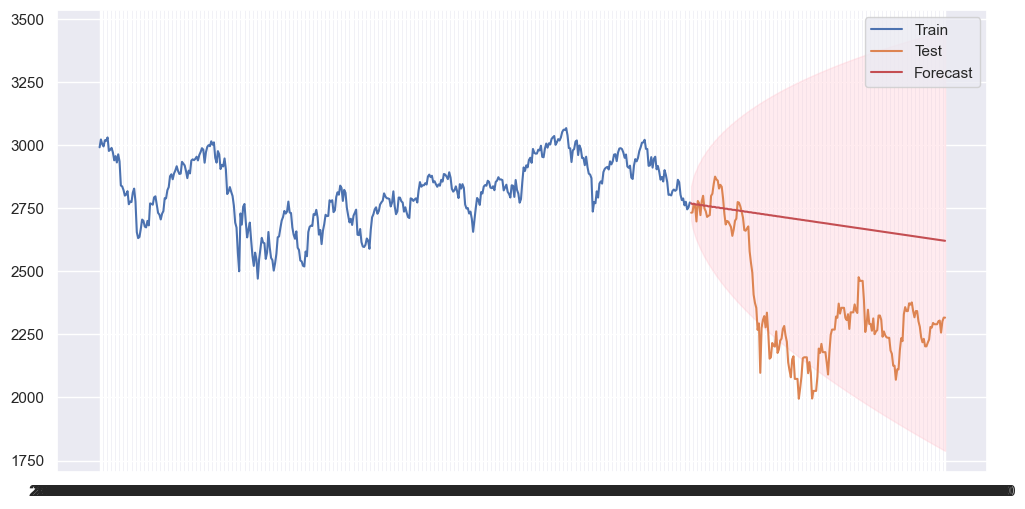

In [72]:
# Обучение модели с найденными оптимальными параметрами
stepwise_fit.fit(train_data.Close)

# Прогнозирование на тестовом наборе данных
forecast, conf_int = stepwise_fit.predict(n_periods=len(test_data), 
                                          return_conf_int=True)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data.Close, label='Train')
plt.plot(test_data.index, test_data.Close, label='Test')
plt.plot(test_data.index, forecast, label='Forecast', color='r')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()